In [1]:
import pandas as pd 

# 사용자 정의 컬럼 이름 설정
column_names = [
    'RCPT_YR', 'CGG_CD', 'CGG_NM', 'STDG_CD', 'STDG_NM', 
    'LOTNO_SE', 'LOTNO_SE_NM', 'MNO', 'SNO', 'BLDG_NM', 
    'CTRT_DAY', 'THING_AMT', 'ARCH_AREA', 'LAND_AREA', 'FLR', 
    'RGHT_SE', 'RTRCN_DAY', 'ARCH_YR', 'BLDG_USG', 'DCLR_SE', 
    'OPBIZ_RESTAGNT_SGG_NM'
]

# 컬럼별 데이터 타입 설정
dtype_dict = {
    'RCPT_YR': 'int64',
    'CGG_CD': 'string',
    'CGG_NM': 'string',
    'STDG_CD': 'string',
    'STDG_NM': 'string',
    'LOTNO_SE': 'string',
    'LOTNO_SE_NM': 'string',
    'MNO': 'string',
    'SNO': 'string',
    'BLDG_NM': 'string',
    'CTRT_DAY': 'string',
    'THING_AMT': 'int64',
    'ARCH_AREA': 'float64',
    'LAND_AREA': 'float64',
    'FLR': 'string', 
    'RGHT_SE': 'string',
    'RTRCN_DAY': 'string', 
    'ARCH_YR': 'string', 
    'BLDG_USG': 'string',
    'DCLR_SE': 'string',
    'OPBIZ_RESTAGNT_SGG_NM': 'string'
}

# 사용자 정의 컬럼 이름과 데이터 타입을 사용하여 CSV 파일 불러오기
df_2018 = pd.read_csv(
    '2018.csv', 
    encoding='euc-kr',  
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1           
)

df_2019 = pd.read_csv(
    '2019.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2020 = pd.read_csv(
    '2020.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2021 = pd.read_csv(
    '2021.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2022 = pd.read_csv(
    '2022.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2023 = pd.read_csv(
    '2023.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2024 = pd.read_csv(
    '2024.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)


# 데이터 확인


real_estate = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

print(real_estate.head())

   RCPT_YR CGG_CD CGG_NM STDG_CD STDG_NM LOTNO_SE LOTNO_SE_NM   MNO   SNO  \
0     2018  11500    강서구   10300     화곡동        1          대지  1159  0000   
1     2018  11410   서대문구   11200     대현동        1          대지  0144  0000   
2     2018  11590    동작구   10700     사당동        1          대지  0169  0032   
3     2018  11350    노원구   10500     상계동        1          대지  1380  0004   
4     2018  11380    은평구   11000     증산동        1          대지  0189  0063   

         BLDG_NM  ... THING_AMT  ARCH_AREA  LAND_AREA  FLR RGHT_SE RTRCN_DAY  \
0  우장산아이파크,이편한세상  ...     95000     101.65        NaN   10    <NA>      <NA>   
1           럭키대현  ...     70000      83.38        NaN   10    <NA>      <NA>   
2             현대  ...     49500      51.66        NaN   10    <NA>      <NA>   
3           초산빌라  ...     16000      41.37      18.38    1    <NA>      <NA>   
4   궁전맨션(189-63)  ...     43000      54.34      27.17    2    <NA>      <NA>   

  ARCH_YR BLDG_USG DCLR_SE OPBIZ_RESTAGNT_SGG_NM  
0    

In [2]:
# 공공데이터 매물 주소 구하기
real_estate['MNO'] = real_estate['MNO'].str.lstrip('0')
real_estate['SNO'] = real_estate['SNO'].str.lstrip('0')

def address(x):
    if pd.notna(x['MNO']) and x['MNO'] != '':
        if pd.notna(x['SNO']) and x['SNO'] != '':
            return '서울특별시' + ' ' + x['CGG_NM'] + ' ' + x['STDG_NM'] + ' ' + x['MNO'] + '-' + x['SNO']
        else:
            return '서울특별시' + ' ' + x['CGG_NM'] + ' ' + x['STDG_NM'] + ' ' + x['MNO']
    else:
        return '서울특별시' + ' ' + x['CGG_NM'] + ' ' + x['STDG_NM']

real_estate['address'] = real_estate.apply(address, axis=1)

In [3]:
# 취소일이 지정된 매물 제외하기
real_estate = real_estate[real_estate['RTRCN_DAY'].isnull()]
real_estate.head(3)

,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM,address
0,2018,11500,강서구,10300,화곡동,1,대지,1159,,"우장산아이파크,이편한세상",...,101.65,NaN,10,<NA>,<NA>,2008,아파트,<NA>,<NA>,서울특별시 강서구 화곡동 1159
1,2018,11410,서대문구,11200,대현동,1,대지,144,,럭키대현,...,83.38,NaN,10,<NA>,<NA>,1999,아파트,<NA>,<NA>,서울특별시 서대문구 대현동 144
2,2018,11590,동작구,10700,사당동,1,대지,169,32,현대,...,51.66,NaN,10,<NA>,<NA>,1991,아파트,<NA>,<NA>,서울특별시 동작구 사당동 169-32


In [4]:
## 방개수와 신축여부 구하기
real_estate = real_estate[['CGG_NM','STDG_NM','MNO','SNO','BLDG_NM','ARCH_AREA','ARCH_YR','THING_AMT','FLR','BLDG_USG','address']]
def count_room(x):
  if x<=30:
    return '1개'
  elif x<=70:
    return '2개'
  elif x<=100:
    return '3개'
  else :
    return '4개'

real_estate['방개수']=real_estate.apply(lambda x:count_room(x['ARCH_AREA']), axis=1)
real_estate.head()

def standard(x):
  list_i=[]
  for i in range(2019, 2025):
    i = str(i)
    list_i.append(i)
  if str(x) in (list_i):
    return '신축'
  else :
    return '구축'

real_estate['신축여부']=real_estate.apply(lambda x:standard(x['ARCH_YR']), axis=1)
real_estate

,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
0,강서구,화곡동,1159,,"우장산아이파크,이편한세상",101.65,2008,95000,10,아파트,서울특별시 강서구 화곡동 1159,4개,구축
1,서대문구,대현동,144,,럭키대현,83.38,1999,70000,10,아파트,서울특별시 서대문구 대현동 144,3개,구축
2,동작구,사당동,169,32,현대,51.66,1991,49500,10,아파트,서울특별시 동작구 사당동 169-32,2개,구축
3,노원구,상계동,1380,4,초산빌라,41.37,1996,16000,1,연립다세대,서울특별시 노원구 상계동 1380-4,2개,구축
4,은평구,증산동,189,63,궁전맨션(189-63),54.34,1992,43000,2,연립다세대,서울특별시 은평구 증산동 189-63,2개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833594,강동구,천호동,330,24,경복빌라,44.11,1991,28500,1,연립다세대,서울특별시 강동구 천호동 330-24,2개,구축
833595,광진구,화양동,527,,KCC파크타운,25.79,2005,19000,14,오피스텔,서울특별시 광진구 화양동 527,1개,구축
833596,마포구,합정동,369,10,그레이스빌2차A,22.44,2004,26300,5,연립다세대,서울특별시 마포구 합정동 369-10,1개,구축
833597,마포구,중동,39,9,백명TRENDYAPT,107.48,2004,76000,6,아파트,서울특별시 마포구 중동 39-9,4개,구축


In [ ]:
# 스트림릿에서 입력된 기준 변수
import sys
sys.path.append(".")
import basicpro_streamlit
from basicpro_streamlit import y, rooms, usg, new_old

y = basicpro_streamlit.y/10000
rooms = basicpro_streamlit.rooms+"개"
usg = basicpro_streamlit.usg
new_old = basicpro_streamlit.new_old


In [ ]:
# 1. 고객이 원하는 기준으로 가격, 방 개수, 건물종류, 신축여부로 필터링하기

from IPython.display import display
def filter_by_price(df):
  filtered = df[df['THING_AMT'] < y]
  return filtered
def filter_by_rooms(df):
  filtered = df[df['방개수'] == rooms]
  return filtered
def filter_by_usg(df):
  filtered = df[df['BLDG_USG'] == usg]
  return filtered
def filter_by_new_old(df):
  filtered = df[df['신축여부'] == new_old]
  return filtered
df_price = filter_by_price(real_estate)
print("\n[금액 조건으로 필터링된 결과]")
display(df_price)
df_rooms = filter_by_rooms(df_price)
print("\n[방 개수 조건으로 필터링된 결과]")
display(df_rooms)
df_usg = filter_by_usg(df_rooms)
print("\n[BLDG_USG 조건으로 필터링된 결과]")
display(df_usg)
df_final = filter_by_new_old(df_usg)
print("\n[신축,구축여부 조건으로 필터링된 결과]")
display(df_final)


[금액 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
2,동작구,사당동,169,32,현대,51.66,1991,49500,10,아파트,서울특별시 동작구 사당동 169-32,2개,구축
3,노원구,상계동,1380,4,초산빌라,41.37,1996,16000,1,연립다세대,서울특별시 노원구 상계동 1380-4,2개,구축
4,은평구,증산동,189,63,궁전맨션(189-63),54.34,1992,43000,2,연립다세대,서울특별시 은평구 증산동 189-63,2개,구축
5,관악구,신림동,1741,,풍원하임빌,28.87,2018,26000,4,연립다세대,서울특별시 관악구 신림동 1741,1개,구축
6,중랑구,망우동,456,7,(456-7),48.79,2007,20000,2,연립다세대,서울특별시 중랑구 망우동 456-7,2개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833591,강서구,화곡동,100,45,거목빌라,29.70,1986,10500,-1,연립다세대,서울특별시 강서구 화곡동 100-45,1개,구축
833594,강동구,천호동,330,24,경복빌라,44.11,1991,28500,1,연립다세대,서울특별시 강동구 천호동 330-24,2개,구축
833595,광진구,화양동,527,,KCC파크타운,25.79,2005,19000,14,오피스텔,서울특별시 광진구 화양동 527,1개,구축
833596,마포구,합정동,369,10,그레이스빌2차A,22.44,2004,26300,5,연립다세대,서울특별시 마포구 합정동 369-10,1개,구축



[방 개수 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
13,은평구,역촌동,43,4,하늘애,84.84,2007,47800,8,아파트,서울특별시 은평구 역촌동 43-4,3개,구축
15,도봉구,방학동,734,,청구아파트,84.97,1994,37000,7,아파트,서울특별시 도봉구 방학동 734,3개,구축
19,관악구,봉천동,1698,1,보라매삼성,84.84,1996,59000,13,아파트,서울특별시 관악구 봉천동 1698-1,3개,구축
20,서대문구,홍은동,265,100,미래테크노빌(B동),75.51,2002,17000,4,연립다세대,서울특별시 서대문구 홍은동 265-100,3개,구축
45,강서구,염창동,266,4,시원트레벨(266-4),85.83,2002,29500,6,오피스텔,서울특별시 강서구 염창동 266-4,3개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833320,노원구,공릉동,690,2,삼익아파트,84.77,1997,58000,3,아파트,서울특별시 노원구 공릉동 690-2,3개,구축
833337,광진구,구의동,37,9,아차산빌라,75.45,2003,38250,3,연립다세대,서울특별시 광진구 구의동 37-9,3개,구축
833397,노원구,월계동,436,,동신,71.77,1983,55000,11,아파트,서울특별시 노원구 월계동 436,3개,구축
833414,양천구,목동,131,23,썬샤인빌,70.03,2012,44000,4,연립다세대,서울특별시 양천구 목동 131-23,3개,구축



[BLDG_USG 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
13,은평구,역촌동,43,4,하늘애,84.84,2007,47800,8,아파트,서울특별시 은평구 역촌동 43-4,3개,구축
15,도봉구,방학동,734,,청구아파트,84.97,1994,37000,7,아파트,서울특별시 도봉구 방학동 734,3개,구축
19,관악구,봉천동,1698,1,보라매삼성,84.84,1996,59000,13,아파트,서울특별시 관악구 봉천동 1698-1,3개,구축
61,도봉구,방학동,508,,우성아파트2,84.98,1993,37000,2,아파트,서울특별시 도봉구 방학동 508,3개,구축
189,강동구,천호동,22,9,고려아파트(D동),84.74,2002,37500,3,아파트,서울특별시 강동구 천호동 22-9,3개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833192,도봉구,도봉동,595,,럭키,84.86,1992,53800,10,아파트,서울특별시 도봉구 도봉동 595,3개,구축
833257,금천구,독산동,955,,신도브래뉴,79.35,2002,56000,6,아파트,서울특별시 금천구 독산동 955,3개,구축
833298,양천구,신정동,879,18,동국화이트빌A동,84.65,2003,55000,3,아파트,서울특별시 양천구 신정동 879-18,3개,구축
833320,노원구,공릉동,690,2,삼익아파트,84.77,1997,58000,3,아파트,서울특별시 노원구 공릉동 690-2,3개,구축



[신축,구축여부 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
169876,구로구,항동,241,,한양수자인에듀힐즈,76.950,2019,48000,10,아파트,서울특별시 구로구 항동 241,3개,신축
174000,구로구,항동,241,,한양수자인에듀힐즈,76.950,2019,54000,3,아파트,서울특별시 구로구 항동 241,3개,신축
183034,구로구,항동,241,,한양수자인에듀힐즈,84.960,2019,47400,2,아파트,서울특별시 구로구 항동 241,3개,신축
190066,구로구,항동,241,,한양수자인에듀힐즈,84.950,2019,49325,7,아파트,서울특별시 구로구 항동 241,3개,신축
192100,은평구,신사동,241,2,벨로스아파트,78.370,2019,40500,4,아파트,서울특별시 은평구 신사동 241-2,3개,신축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753166,양천구,신월동,1075,,목동센트럴아이파크위브1단지,84.970,2020,58000,3,아파트,서울특별시 양천구 신월동 1075,3개,신축
756793,구로구,항동,241,,한양수자인에듀힐즈,84.954,2019,56000,13,아파트,서울특별시 구로구 항동 241,3개,신축
795688,종로구,구기동,125,5,마운틴뷰,74.820,2019,59000,5,아파트,서울특별시 종로구 구기동 125-5,3개,신축
809801,종로구,구기동,125,5,마운틴뷰,74.870,2019,58700,3,아파트,서울특별시 종로구 구기동 125-5,3개,신축


In [6]:
# 2. 추천 법정동 찾기(Top N개 법정동 추출)
## 1번에서 추출된 법정동에 지표별 리스트를 merge → 모든 지표값이 null이면 해당 법정동 삭제
# 사용한 라이브러리
import pandas as pd
from functools import reduce
import numpy as np
# 법정동 테이블
df0 = pd.read_csv('법정동.csv')
df0 = df0[df0['시도명'] == '서울특별시'].drop(['법정동코드', '리명', '순위', '생성일자', '과거법정동코드'], axis = 1)
df0 = df0[df0['삭제일자'].isnull()].reset_index().drop(['삭제일자', 'index', '시도명'], axis=1)
df0 = df0[df0['읍면동명'].notnull()]
법정동 = df0.rename(columns={'시군구명':'CGG_NM', '읍면동명':'STDG_NM'}).reset_index(drop=True)
# 서울시 동별 입시 보습 학원 개수
df1 = pd.read_csv('서울시 학원 교습소 정보.csv', encoding='cp949')
df1 = df1[df1['분야명'] == '입시.검정 및 보습']
df1['CGG_NM'] = df1['도로명주소'].str.extract(r'([가-힣]+구)')
df1['STDG_NM'] = df1['도로명상세주소'].str.extract(r'\(([^,()]+동)')
학원개수 = df1[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
학원개수.columns = ['CGG_NM', 'STDG_NM', 'academy']
# 서울시 동별 유흥주점 개수
df2 = pd.read_csv('서울시 유흥주점영업 인허가 정보.csv', encoding='euc-kr')
df2['CGG_NM'] = df2['지번주소'].str.extract(r'([가-힣]+구)')
df2['STDG_NM'] = df2['지번주소'].str.extract(r'(\S+동)')
유흥주점 = df2[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
유흥주점.columns = ['CGG_NM', 'STDG_NM', 'bar']
# 서울시 동별 병의원 개수
df3 = pd.read_csv('서울시 병의원 위치 정보.csv', encoding='cp949')
df3['CGG_NM'] = df3['주소'].str.extract(r'([가-힣]+구)')
df3['STDG_NM'] = df3['주소'].str.extract(r'\(([^,()]+동)')
병의원수 = df3[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
병의원수.columns = ['CGG_NM', 'STDG_NM', 'hospital']
# 서울시 동별 2차병원
df4 = pd.read_csv('2차병원.csv', encoding='cp949')
df4 = df4[df4['소재지주소'].str.contains('서울특별시')]
df4['CGG_NM'] = df4['소재지주소'].str.extract(r'([가-힣]+구)')
df4['STDG_NM'] = df4['소재지주소'].str.extract(r'\(([^)]+)\)')
병원_2차 = df4[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
병원_2차.columns = ['CGG_NM', 'STDG_NM', 'second_hospital']
# 서울시 동별 3차병원
df5 = pd.read_csv('3차병원.csv',encoding='cp949')
df5 = df5[df5['소재지주소'].str.contains('서울특별시')]
df5['CGG_NM'] = df5['소재지주소'].str.extract(r'([가-힣]+구)')
df5['STDG_NM'] = df5['소재지주소'].str.extract(r'\(([^)]+)\)')
병원_3차 = df5[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
병원_3차.columns = ['CGG_NM', 'STDG_NM', 'third_hospital']
# 대규모점포 테이블 불러오기
df6 = pd.read_csv('서울시 대규모점포 인허가 정보.csv', encoding='euc-kr')
df6 = df6[df6['상세영업상태명'] == '정상영업']
df6['CGG_NM'] = df6['도로명주소'].str.extract(r'([가-힣]+구)')
df6['STDG_NM'] = df6['도로명주소'].str.extract(r'\(([^,()]+동)')
대규모점포 = df6[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
대규모점포.columns = ['CGG_NM', 'STDG_NM', 'store']
# 외부 자료끼리 병합
merge_data = reduce(lambda x,y: pd.merge(x,y, on=['CGG_NM', 'STDG_NM'], how='left'), [법정동, 학원개수, 유흥주점, 대규모점포, 병의원수, 병원_2차, 병원_3차])
merge_data = merge_data.dropna(how='all', subset=['academy', 'bar', 'store', 'hospital', 'second_hospital', 'third_hospital']).reset_index(drop=True)


In [7]:
# 2. 추천 법정동 찾기(Top N개 법정동 추출)
## 엔트로피 가중치를 이용한 상위 N개 법정동 추출
# 병원 가중치
merge_data['w_second'] = merge_data['second_hospital'] * 5
merge_data['w_third'] = merge_data['third_hospital'] * 20
merge_data = merge_data.fillna(0)
merge_data['t_hospital'] = merge_data['hospital'] + merge_data['w_second'] + merge_data['w_third']
# 엔트로피 지수 구할 지표 추출
data = merge_data[['academy', 'bar', 'store', 't_hospital']]
# 엔트로피 가중치
# 1. 정규화(MIN_MAX)
norm = (data - data.min()) / (data.max() - data.min())
# 2. 엔트로피값
k = 1/np.log(len(data))
entropy = []
for col in norm.columns:
    p = norm[col]/norm[col].sum()
    p = p[p > 0]
    answer = np.sum(p * np.log(p))
    entropy.append(-k * answer)
# 3. 다양성
d = [1-i for i in entropy]
# 4.가중치
w = [i/sum(d) for i in d]
# 가중치 곱한 최종 점수 상위 5개 법정동
top10 = merge_data[['CGG_NM', 'STDG_NM']].copy()
top10['score'] = w[0] * norm['academy'] - w[1] * norm['bar'] + w[2] * norm['store'] + w[3] * norm['t_hospital']
top10 = top10.sort_values('score', ascending=False).head(10)
top10

,CGG_NM,STDG_NM,score
273,강남구,대치동,0.378522
213,양천구,목동,0.308932
212,양천구,신정동,0.238327
81,중구,신당동,0.227167
274,강남구,신사동,0.226731
226,구로구,구로동,0.194614
160,노원구,상계동,0.181432
161,노원구,중계동,0.177573
149,강북구,미아동,0.164938
118,광진구,구의동,0.161837


In [8]:
filtered_real_estate = pd.merge(df_final, top10, how='inner', on=['CGG_NM', 'STDG_NM'])
filtered_real_estate

,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부,score
0,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,51800,4,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932
1,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,56000,11,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932
2,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,54250,4,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932
3,강북구,미아동,1369,,꿈의숲해링턴플레이스,84.67,2019,52980,6,아파트,서울특별시 강북구 미아동 1369,3개,신축,0.164938
4,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,54200,10,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932


In [9]:
# 3. 위치 데이터 이용_경로 계산
## 지하철역 위치 데이터 불러오기
df_sub_addr = pd.read_excel('전체_도시철도역사정보_20250417.xlsx')
df_sub_addr = df_sub_addr[df_sub_addr['운영기관명'].str.contains('서울')]
df_sub_addr.loc[:, 'CGG_NM'] = df_sub_addr['역사도로명주소'].str.extract(r'([가-힣]+구)')
df_sub_addr.loc[:, 'STDG_NM'] = df_sub_addr['역사도로명주소'].str.extract(r'\(([^,()]+동)')
subway = df_sub_addr[['CGG_NM', 'STDG_NM', '역사명', '역위도', '역경도']]
subway = subway.drop_duplicates(subset='역사명')

filtered_subway = subway[
    (subway['CGG_NM'].isin(filtered_real_estate['CGG_NM'])) &
    (subway['STDG_NM'].isin(filtered_real_estate['STDG_NM']))
]

print(filtered_subway)

    CGG_NM STDG_NM          역사명        역위도         역경도
61     강북구     미아동  미아(서울사이버대학)  37.626435  127.026151
62     강북구     미아동        미아사거리  37.613276  127.030083
596    양천구      목동           목동  37.526088  126.864296
615    양천구      목동  오목교(목동운동장앞)  37.524557  126.875049


In [10]:
## 학교 위치 데이터 불러오기
df_school_addr = pd.read_csv('전국초중등학교위치표준데이터.csv', encoding='cp949')
df_school_addr = df_school_addr[df_school_addr['시도교육청명'] == '서울특별시교육청']
df_school_addr.loc[:, 'CGG_NM'] = df_school_addr['소재지지번주소'].str.extract(r'([가-힣]+구)')
df_school_addr.loc[:, 'STDG_NM'] = df_school_addr['소재지지번주소'].str.extract(r'([가-힣]+동)')
school = df_school_addr[['CGG_NM', 'STDG_NM', '학교명', '위도', '경도']]

filtered_school = school[
    (school['CGG_NM'].isin(filtered_real_estate['CGG_NM'])) &
    (school['STDG_NM'].isin(filtered_real_estate['STDG_NM']))
]
print(filtered_school)

      CGG_NM STDG_NM         학교명         위도          경도
663      양천구      목동    서울경인초등학교  37.532871  126.885696
1352     양천구      목동    서울정목초등학교  37.536529  126.870049
1409     강북구     미아동      영훈초등학교  37.614682  127.028093
1471     양천구      목동       양동중학교  37.548369  126.868717
1614     강북구     미아동      삼각산중학교  37.616149  127.014568
1618     양천구      목동    서울목운초등학교  37.527010  126.873044
2158     강북구     미아동      솔샘고등학교  37.623667  127.012135
3001     강북구     미아동    서울송중초등학교  37.617000  127.031466
3159     강북구     미아동  성암국제무역고등학교  37.620414  127.023906
3183     양천구      목동       양정중학교  37.535384  126.887734
3957     강북구     미아동      신일고등학교  37.627967  127.028403
3991     강북구     미아동   서울삼각산초등학교  37.616149  127.014568
4023     강북구     미아동     성암여자중학교  37.620414  127.023906
4028     양천구      목동      양정고등학교  37.535392  126.887734
4408     양천구      목동       영도중학교  37.536316  126.865771
4552     강북구     미아동     창문여자중학교  37.613406  127.035796
4605     강북구     미아동     삼각산고등학교  37.616286  127

In [13]:
import pandas as pd
import requests
import time
# ① 카카오 REST API 키 입력
KAKAO_REST_API_KEY = "58a94e08cd433f0a789ddee57624f990"
# ② 주소 → 위도/경도 함수
def get_coords_from_address(address, api_key):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {api_key}"}
    params = {"query": address}
    try:
        res = requests.get(url, headers=headers, params=params)
        if res.status_code == 200:
            data = res.json()
            if data['documents']:
                first = data['documents'][0]
                lat = float(first['y'])  # 위도
                lng = float(first['x'])  # 경도
                return lat, lng
    except:
        pass
    return None, None  # 실패 시
# ③ CSV 파일 불러오기
 # 주소 컬럼 이름이 'address'이어야 함
# ④ 위도/경도 리스트 생성
lat_list = []
lng_list = []
# ⑤ 각 행의 address로 좌표 요청
for addr in filtered_real_estate['address']:
    lat, lng = get_coords_from_address(addr, KAKAO_REST_API_KEY)
    lat_list.append(lat)
    lng_list.append(lng)
# ⑥ 좌표 컬럼 추가
filtered_real_estate['위도'] = lat_list
filtered_real_estate['경도'] = lng_list


filtered_real_estate['BLDG_NM'].value_counts()

BLDG_NM
목동벨로스주상복합     4
꿈의숲해링턴플레이스    1
Name: count, dtype: Int64

/Users/t2023-m0051/.pyenv/versions/3.12.3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: One or several characters couldn't be converted correctly from UTF-8 to EUC-KR.  This warning will not be emitted anymore
  ogr_write(


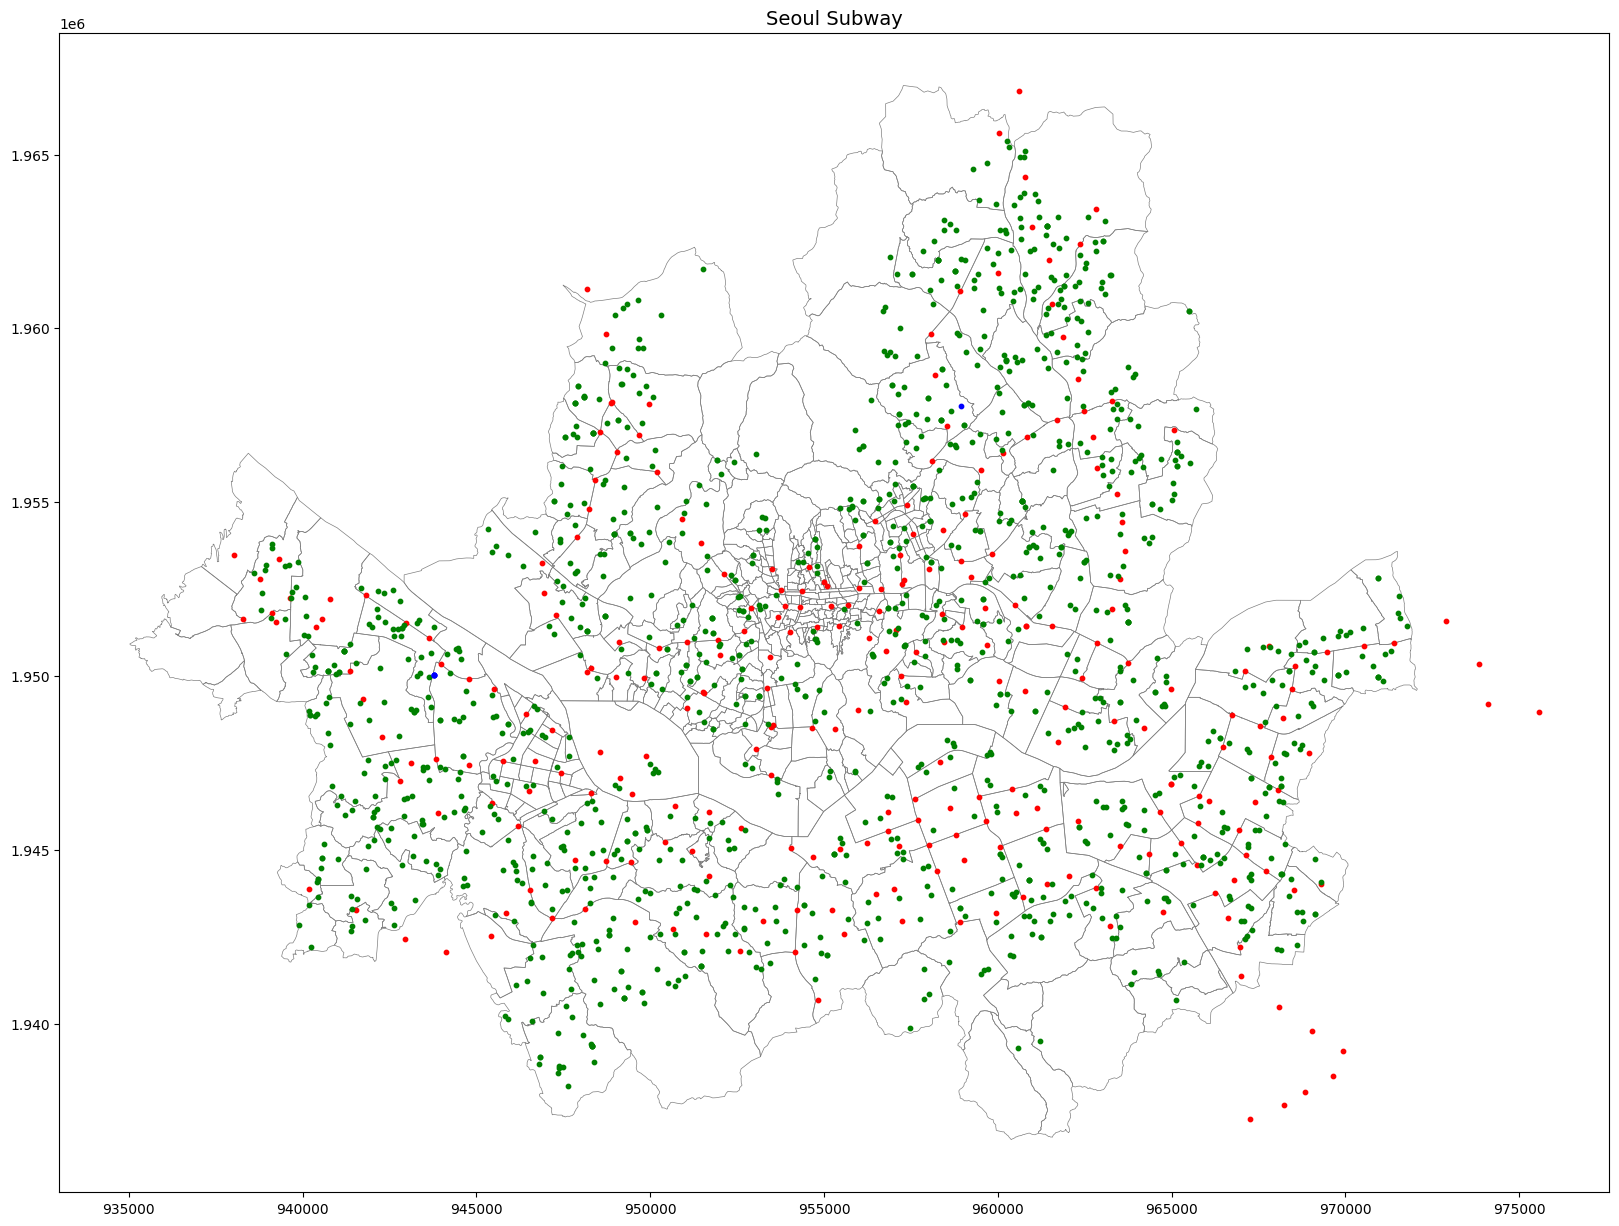

5
5


In [15]:
# SHP 파일로 변환
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt


geometry = [Point(xy) for xy in zip(filtered_real_estate['경도'], filtered_real_estate['위도'])]
gdf_points = gpd.GeoDataFrame(filtered_real_estate, geometry=geometry, crs="EPSG:4326")
gdf_points = gdf_points.to_crs(epsg=5179)
gdf_points.to_file("real_estate_points_5179.shp", encoding="euc-kr")
gdf_estate = gpd.read_file("real_estate_points_5179.shp")

geometry1 = [Point(xy) for xy in zip(subway["역경도"], subway["역위도"])]
gdf_points1 = gpd.GeoDataFrame(subway, geometry=geometry1, crs="EPSG:4326")
gdf_points1 = gdf_points1.to_crs(epsg=5179)
gdf_points1.to_file("seoul_sub_points_5179.shp", encoding="euc-kr")
gdf_subway = gpd.read_file("seoul_sub_points_5179.shp")

geometry2 = [Point(xy) for xy in zip(school["경도"], school["위도"])]
gdf_points2 = gpd.GeoDataFrame(school, geometry=geometry2, crs="EPSG:4326")
gdf_points2 = gdf_points2.to_crs(epsg=5179)
gdf_points2.to_file("seoul_school_points_5179.shp", encoding="euc-kr")
gdf_school = gpd.read_file("seoul_school_points_5179.shp")


gdf_boundary = gpd.read_file("seoul_emd.shp", encoding='euc-kr')
gdf_boundary = gdf_boundary.to_crs(epsg=5179)

fig, ax = plt.subplots(figsize=(20, 20))
gdf_boundary.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.5)
gdf_subway.plot(ax=ax, color='red', markersize=10)
gdf_school.plot(ax=ax, color='green', markersize=10)
gdf_estate.plot(ax=ax, color='blue', markersize=10)
ax.set_title("Seoul Subway", fontsize=14)
plt.show()  

print(len(filtered_real_estate))
print(len(gdf_estate))

In [16]:
import requests
import folium
import pandas as pd
# Mapbox API 키
MAPBOX_TOKEN = 'pk.eyJ1IjoidmxmdG1kNjAwOCIsImEiOiJjbWMxaTRkOGswNmQ5Mmtvano2MmdqdHdrIn0.ckEJMKAK1p8t7Ss3XfFsFg'
# 지하철 좌표 및 이름
gdf_subway = gpd.read_file("seoul_sub_points_5179.shp").to_crs(epsg=4326)  # WGS84로 변환
subway_coords = list(gdf_subway.geometry.apply(lambda geom: (geom.y, geom.x)))  # (lat, lon)
subway_info = list(zip(gdf_subway.geometry.x, gdf_subway.geometry.y, gdf_subway['역사명']))
# 결과 리스트
valid_pairs = []
# 지도 초기화
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
# 반복
for idx, row in filtered_real_estate.iterrows():
    dest_lat = row['위도']
    dest_lon = row['경도']
    address = row['address']
    if dest_lat == 0.0 or dest_lon == 0.0:
        continue
    # 가장 가까운 지하철 찾기
    closest = min(subway_info, key=lambda x: ((dest_lat - x[1])**2 + (dest_lon - x[0])**2))
    subway_lon, subway_lat, station_name = closest
    origin = f"{subway_lon},{subway_lat}"
    destination = f"{dest_lon},{dest_lat}"
    url = f"https://api.mapbox.com/directions/v5/mapbox/walking/{origin};{destination}"
    params = {
        "access_token": MAPBOX_TOKEN,
        "geometries": "geojson",
        "overview": "full"
    }
    try:
        response = requests.get(url, params=params)
        data = response.json()
        if 'routes' not in data or not data['routes']:
            continue
        distance = data['routes'][0]['distance']  # meters
        if distance <= 800:
            # 리스트 저장
            valid_pairs.append({
                '매물주소': address,
                '지하철역': station_name,
                '도보거리(m)': round(distance)
            })
            # 지도에 경로 시각화
            coordinates = data['routes'][0]['geometry']['coordinates']
            folium.PolyLine(
                locations=[[lat, lon] for lon, lat in coordinates],
                color="blue", weight=3, opacity=0.7
            ).add_to(m)
            # 마커 (매물, 지하철)
            folium.Marker(
                [dest_lat, dest_lon],
                popup=f"매물\n{address}",
                icon=folium.Icon(color="red", icon="home")
            ).add_to(m)
            folium.Marker(
                [subway_lat, subway_lon],
                popup=f"지하철: {station_name}",
                icon=folium.Icon(color="green", icon="train")
            ).add_to(m)
    except Exception as e:
        print(f"오류 발생: {origin} → {destination} / {e}")
        continue
# 결과 출력
result_df = pd.DataFrame(valid_pairs)
display(result_df)
# 지도 저장 및 시각화 (Jupyter에서 바로 시각화)
m.save("mapbox_routes_filtered.html")
m

,매물주소,지하철역,도보거리(m)
0,서울특별시 양천구 목동 614-8,등촌,455
1,서울특별시 양천구 목동 614-8,등촌,455
2,서울특별시 양천구 목동 614-8,등촌,455
3,서울특별시 양천구 목동 614-8,등촌,455


In [17]:
result_df

filtered_real_estate = filtered_real_estate[(filtered_real_estate['address'].isin(result_df['매물주소']))]
print(filtered_real_estate)

  CGG_NM STDG_NM  MNO SNO    BLDG_NM  ARCH_AREA ARCH_YR  THING_AMT FLR  \
0    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      51800   4   
1    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      56000  11   
2    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      54250   4   
4    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      54200  10   

  BLDG_USG             address 방개수 신축여부     score         위도          경도  
0      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
1      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
2      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
4      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  


In [18]:
import requests
import folium
import pandas as pd
# Mapbox API 키
MAPBOX_TOKEN = 'pk.eyJ1IjoidmxmdG1kNjAwOCIsImEiOiJjbWMxaTRkOGswNmQ5Mmtvano2MmdqdHdrIn0.ckEJMKAK1p8t7Ss3XfFsFg'
# 학교 좌표 및 이름
gdf_school = gpd.read_file("seoul_school_points_5179.shp").to_crs(epsg=4326)  # WGS84로 변환
school_coords = list(gdf_school.geometry.apply(lambda geom: (geom.y, geom.x)))  # (lat, lon)
school_info = list(zip(gdf_school.geometry.x, gdf_school.geometry.y, gdf_school['학교명']))
# 결과 리스트
valid_pairs = []
# 지도 초기화
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
# 반복
for idx, row in filtered_real_estate.iterrows():
    dest_lat = row['위도']
    dest_lon = row['경도']
    address = row['address']
    if dest_lat == 0.0 or dest_lon == 0.0:
        continue
    # 가장 가까운 학교 찾기
    closest = min(school_info, key=lambda x: ((dest_lat - x[1])**2 + (dest_lon - x[0])**2))
    school_lon, school_lat, school_name = closest
    origin = f"{school_lon},{school_lat}"
    destination = f"{dest_lon},{dest_lat}"
    url = f"https://api.mapbox.com/directions/v5/mapbox/walking/{origin};{destination}"
    params = {
        "access_token": MAPBOX_TOKEN,
        "geometries": "geojson",
        "overview": "full"
    }
    try:
        response = requests.get(url, params=params)
        data = response.json()
        if 'routes' not in data or not data['routes']:
            continue
        distance = data['routes'][0]['distance']  # meters
        if distance <= 800:
            # 리스트 저장
            valid_pairs.append({
                '매물주소': address,
                '학교': school_name,
                '도보거리(m)': round(distance)
            })
            # 지도에 경로 시각화
            coordinates = data['routes'][0]['geometry']['coordinates']
            folium.PolyLine(
                locations=[[lat, lon] for lon, lat in coordinates],
                color="blue", weight=3, opacity=0.7
            ).add_to(m)
            # 마커 (매물, 학교)
            folium.Marker(
                [dest_lat, dest_lon],
                popup=f"매물\n{address}",
                icon=folium.Icon(color="red", icon="home")
            ).add_to(m)
            folium.Marker(
                [school_lat, school_lon],
                popup=f"학교: {school_name}",
                icon=folium.Icon(color="green", icon="school")
            ).add_to(m)
    except Exception as e:
        print(f"오류 발생: {origin} → {destination} / {e}")
        continue
# 결과 출력
result_df1 = pd.DataFrame(valid_pairs)
display(result_df1)
# 지도 저장 및 시각화 (Jupyter에서 바로 시각화)
m.save("mapbox_routes_filtered.html")
m

,매물주소,학교,도보거리(m)
0,서울특별시 양천구 목동 614-8,영일고등학교,168
1,서울특별시 양천구 목동 614-8,영일고등학교,168
2,서울특별시 양천구 목동 614-8,영일고등학교,168
3,서울특별시 양천구 목동 614-8,영일고등학교,168


In [19]:
result_df1

filtered_real_estate = filtered_real_estate[(filtered_real_estate['address'].isin(result_df1['매물주소']))]
print(filtered_real_estate)

  CGG_NM STDG_NM  MNO SNO    BLDG_NM  ARCH_AREA ARCH_YR  THING_AMT FLR  \
0    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      51800   4   
1    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      56000  11   
2    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      54250   4   
4    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      54200  10   

  BLDG_USG             address 방개수 신축여부     score         위도          경도  
0      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
1      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
2      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
4      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  


In [20]:
print(filtered_real_estate.head(10))

  CGG_NM STDG_NM  MNO SNO    BLDG_NM  ARCH_AREA ARCH_YR  THING_AMT FLR  \
0    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      51800   4   
1    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      56000  11   
2    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      54250   4   
4    양천구      목동  614   8  목동벨로스주상복합      71.47    2019      54200  10   

  BLDG_USG             address 방개수 신축여부     score         위도          경도  
0      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
1      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
2      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  
4      아파트  서울특별시 양천구 목동 614-8  3개   신축  0.308932  37.547854  126.863578  


In [21]:
filtered_real_estate = filtered_real_estate.sort_values(by=['THING_AMT','BLDG_NM'], ascending=[False,True]).reset_index(drop=True)
filtered_real_estate

,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부,score,위도,경도
0,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,56000,11,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932,37.547854,126.863578
1,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,54250,4,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932,37.547854,126.863578
2,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,54200,10,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932,37.547854,126.863578
3,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,51800,4,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932,37.547854,126.863578


In [22]:
# 1. 건물 이름별 매물 개수 계산
bldg_counts = filtered_real_estate['address'].value_counts().reset_index()
bldg_counts.columns = ['address', '매물개수']

# 2. 고유한 건물만 추출
unique_buildings = filtered_real_estate.drop_duplicates(subset='address')

# 3. 매물 개수 정보를 병합
result = unique_buildings.merge(bldg_counts, on='address', how='left')
result

,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부,score,위도,경도,매물개수
0,양천구,목동,614,8,목동벨로스주상복합,71.47,2019,56000,11,아파트,서울특별시 양천구 목동 614-8,3개,신축,0.308932,37.547854,126.863578,4
